# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Problem Description

The following describe about the problem being considered instructions:
    
 * COVID-19 is an infectious disease caused by the Corona Virus, biologically known as severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in Wuhan, the capital of China's Hubei province in December 2019 and has spread all over the world since then. In this problem, I will take a look at the current situation  of Covid 19 in India. We will take a look at the regions which are most affected by the outbreak. Most impotantly I will try to estimate the reproduction Number for various states in India. 
 
With the population and other region specified data added to the covid 19 dataset can help us in making some useful comparison.First I would be intrested in looking out the percentage of the infected persons per state and the death percentage. Next I would like to calucalte the reproduction number
 
This reproduction number (R0) can be consider as the average number of people infected from a person with an infection  in a population where all individuals are susceptible to infection. This is a crucial parameter in describing an epidemic. If the average R0 in the population is greater than 1, the infection will spread exponentially. If R0 is less than 1, the infection will spread only slowly, and it will eventually die out. The higher the value of R0, the faster an epidemic will progress. 
If the effective reproduction number Re = R0 x (S/N) is bigger than 1, the disease spreads. Conversely if the time-varying reproduction number Rt can be reduced over time, the disease can be contained. 
The reproduction number R0 as the product of D*O*T*S, where :

D = duration (number of days someone is infectious)
O = opportunities for transmission (number of person-person greetings / day)
T = probability of transmission
S = susceptibility (proportion of population susceptible)


For COVID-19, without intervention (per Kucharski, TED Interview): 
D (number of days someone is infectious) is approx. 1-2 weeks, before isolation. This includes ~5-6 days incubation until symptoms, and often an additional ~2-5 days before isolation. 
O (number of person-person greetings/day) is modeled as ~5-10 people/day (person-person greetings) under usual behavior
T (probability of the virus being transmitted in an interaction) is approx. 1/3. This is high compared to Flu and SARS.
S (proportion of population susceptible) is high i.e. 95-100%. Per Kucharski (TED Interview)

The initial focus of public health experts with COVID-19 has been on suppression i.e. reducing R0 to below 1 by isolating infected people, reducing case numbers and maintaining this situation until a vaccine is available. This worked well for SARS but not for COVID-19 because many infected people are asymptomatic and go undetected

* For this analysis the time series data of confirmed cases as well as total population for each state  is obtained from the kaggle 
            https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=covid_19_india.csv  
            https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=population_india_census2011.csv 


The analysis follow as 

   



In [69]:
import pandas as pd
import numpy as np

#dataset for the covid 19 for india contains death, confirmed , cured with state and UT information
df_covid = pd.read_csv('Covid19/datasets_557629_1255329_covid_19_india.csv', index_col = False,
                       usecols=['Date','State/UnionTerritory','Deaths','Confirmed'])

df_covid['State/UnionTerritory'].replace({'Telengana':'Telangana'},inplace=True)

#to print number of column and rows
df_covid.shape
#To convert date to Datetime in python and specify a specific format. Then pnly we can apply cut on it.

df_covid['Date']  = pd.to_datetime(df_covid['Date'],format = '%d/%m/%y')

# to strip 00.00.00 from time
df_covid['Date_only'] = df_covid['Date'].dt.date
#df_covid['Date_cut'] = df_covid['Date']

#Total number of  death and confrimed dataset with the last date
df_covid_death = df_covid[['Date','State/UnionTerritory','Deaths','Confirmed']].copy()
df_covid_death = df_covid_death[df_covid_death['Date'] ==  '2020-06-17' ] 
df_covid_death.drop(['Date'],axis=1,inplace=True)

# range of cases 
df_covid = df_covid[df_covid['Date'] >=  '2020-03-31' ]
df_covid = df_covid[df_covid['Date'] <  '2020-04-05' ]


# check missing values in dataframe

#print(df_covid_range['State/UnionTerritoray'].unique())
df_covid =df_covid.pivot_table(values='Confirmed', columns='Date_only', index='State/UnionTerritory')
df_covid.reset_index(inplace=True)




In [70]:
#population dataset 
df_population = pd.read_csv('Covid19/datasets_557629_1255329_population_india_census2011.csv')
df_population.rename(columns={"State / Union Territory": "State/UnionTerritory"}, inplace=True)
df_population['State/UnionTerritory'].replace({'Telengana':'Telangana'},inplace=True)

#merge both the dataset on the basis of the state or UT of India
df_1 = df_population.merge(df_covid, how = 'outer' )
df_1.drop(['Rural population', 'Urban population','Area','Density','Gender Ratio'],axis=1,inplace=True)
df = df_1.merge(df_covid_death,how = 'outer' )

#print(df_population['State/UnionTerritory'].unique())


In [71]:
#calucate % affected person per state and % death
df['perc_death'] = (df['Deaths']/df['Confirmed'])*100
df['perc_affected'] = (df['Confirmed']/df['Population'])*1000
df.set_index('State/UnionTerritory',inplace=True)
df.drop(['Cases being reassigned to states','Unassigned','Lakshadweep'], axis=0, inplace=True)
df

,Sno,Population,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,Deaths,Confirmed,perc_death,perc_affected
State/UnionTerritory,,,,,,,,,,,
Uttar Pradesh,1.0,199812341.0,101.0,103.0,113.0,172.0,174.0,417.0,14091.0,2.959336,0.070521
Maharashtra,2.0,112374333.0,216.0,302.0,335.0,335.0,490.0,5537.0,113445.0,4.880779,1.009528
Bihar,3.0,104099452.0,15.0,23.0,24.0,29.0,30.0,41.0,6778.0,0.604898,0.065111
West Bengal,4.0,91276115.0,26.0,37.0,53.0,63.0,69.0,495.0,11909.0,4.156520,0.130472
Madhya Pradesh,5.0,72626809.0,47.0,66.0,99.0,104.0,104.0,476.0,11083.0,4.294866,0.152602
Tamil Nadu,6.0,72147030.0,74.0,234.0,234.0,309.0,411.0,528.0,48019.0,1.099565,0.665571
Rajasthan,7.0,68548437.0,74.0,93.0,108.0,167.0,200.0,308.0,13216.0,2.330508,0.192798
Karnataka,8.0,61095297.0,83.0,101.0,110.0,124.0,128.0,94.0,7530.0,1.248340,0.123250
Gujarat,9.0,60439692.0,73.0,82.0,87.0,95.0,105.0,1533.0,24577.0,6.237539,0.406637


In [72]:
print(df.iloc[:,3])
df['Case_per_10million'] = (df['Confirmed']/df['Population'])*10000000
#df['Rzero'] =  np.exp((((np.log(population/((1/(df.iloc[:,7]/(population*df.iloc[:,3])))-1)))/5)))
df['Rzero'] =  np.exp((((np.log(df['Population']/((1/(df.iloc[:,7]/(df['Population']*df.iloc[:,3])))-1)))/5)))


State/UnionTerritory
Uttar Pradesh                               103.0
Maharashtra                                 302.0
Bihar                                        23.0
West Bengal                                  37.0
Madhya Pradesh                               66.0
Tamil Nadu                                  234.0
Rajasthan                                    93.0
Karnataka                                   101.0
Gujarat                                      82.0
Andhra Pradesh                               83.0
Odisha                                        4.0
Telangana                                    96.0
Kerala                                      241.0
Jharkhand                                     1.0
Assam                                         1.0
Punjab                                       42.0
Chhattisgarh                                  9.0
Haryana                                      43.0
Uttarakhand                                   7.0
Himachal Pradesh             

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
df.sort_values(by='perc_death', ascending=False,inplace=True)
#df.set_index("State/UnionTerritory",inplace=True)
df.reset_index(inplace=True)
df

,State/UnionTerritory,Sno,Population,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,Deaths,Confirmed,perc_death,perc_affected,Case_per_10million,Rzero
0,Gujarat,9.0,60439692.0,73.0,82.0,87.0,95.0,105.0,1533.0,24577.0,6.237539,0.406637,4066.367512,1.796163
1,Maharashtra,2.0,112374333.0,216.0,302.0,335.0,335.0,490.0,5537.0,113445.0,4.880779,1.009528,10095.276828,1.789178
2,Madhya Pradesh,5.0,72626809.0,47.0,66.0,99.0,104.0,104.0,476.0,11083.0,4.294866,0.152602,1526.020508,1.484611
3,West Bengal,4.0,91276115.0,26.0,37.0,53.0,63.0,69.0,495.0,11909.0,4.156520,0.130472,1304.722490,1.679889
4,Delhi,29.0,16787941.0,97.0,152.0,219.0,219.0,445.0,1837.0,44688.0,4.110723,2.661911,26619.107132,1.646088
5,Telangana,12.0,35003674.0,79.0,96.0,107.0,158.0,159.0,191.0,5406.0,3.533111,0.154441,1544.409310,1.147499
6,Uttar Pradesh,1.0,199812341.0,101.0,103.0,113.0,172.0,174.0,417.0,14091.0,2.959336,0.070521,705.211697,1.322695
7,Puducherry,31.0,1247953.0,1.0,3.0,3.0,5.0,5.0,6.0,216.0,2.777778,0.173083,1730.834414,1.148699
8,Rajasthan,7.0,68548437.0,74.0,93.0,108.0,167.0,200.0,308.0,13216.0,2.330508,0.192798,1927.979773,1.270614
9,Meghalaya,22.0,2966889.0,NaN,NaN,NaN,NaN,NaN,1.0,44.0,2.272727,0.014830,148.303492,NaN


In [74]:
#%matplotlib notebook
#import matplotlib as mpl 
#import matplotlib.pyplot as plt
#plt.figure(figsize=(40,70))
#fig, ax1 = plt.subplots()
#plt.plot(df['State/UnionTerritory'], df['perc_death'] ,'o', '-k', c = 'blue', alpha=0.3,label ='Deaths')
#ax1.plot(df['perc_death'] , '-o', c = 'blue', alpha=0.3,label ='Deaths')
#ax1.plot(df['perc_affected'] , '-k', c = 'red', alpha=0.3,label ='Affected')
#ax2 = ax1.twinx()
#ax2.plot(df['case'] , '-k', c = 'green', alpha=0.3,label ='R0')
#plt.savefig("covid19_india.pdf")
#plt.show()




<Figure size 2880x5040 with 0 Axes>

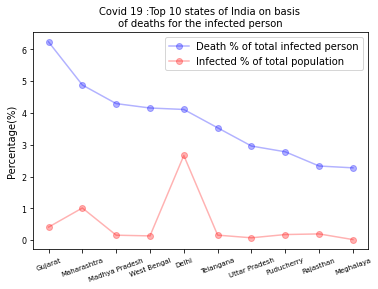

In [75]:

df_new = df[:10]
df_new

#%matplotlib notebook
import matplotlib as mpl 
import matplotlib.pyplot as plt
plt.figure(figsize=(40,70))
fig, ax2 = plt.subplots()
ax2.plot(df_new['State/UnionTerritory'], df_new['perc_death'] ,'-o', c = 'blue', alpha=0.3,label ='Death % of total infected person')
ax2.plot(df_new['State/UnionTerritory'], df_new['perc_affected'] ,'-o', c = 'red', alpha=0.3,label ='Infected % of total population  ')

plt.xticks(rotation=20)
plt.legend()
ax2.set_title('Covid 19 :Top 10 states of India on basis \n of deaths for the infected person ', fontdict={'fontsize': '10', 'fontweight' : '2'})
ax2.set_ylabel("Percentage(%)",fontdict={'fontsize': '10', 'fontweight' : '2'})
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.tick_params(axis='both', which='minor', labelsize=10)
plt.yticks(fontsize=8)
plt.legend()
plt.savefig("covid19_india_death.pdf")
#plt.show()

<Figure size 2880x5040 with 0 Axes>

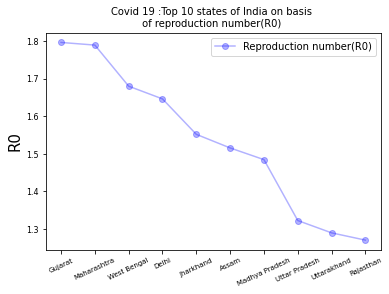

In [76]:
df.sort_values(by='Rzero', ascending=False,inplace=True)
df_new = df[:10]
df_new
#%matplotlib notebook
import matplotlib as mpl 
import matplotlib.pyplot as plt
plt.figure(figsize=(40,70))
fig, ax2 = plt.subplots()
ax2.plot(df_new['State/UnionTerritory'], df_new['Rzero'] ,'-o', c = 'blue', alpha=0.3,label = 'Reproduction number(R0)')


plt.xticks(rotation=25)
plt.legend()
ax2.set_title('Covid 19 :Top 10 states of India on basis \n of reproduction number(R0)  ', fontdict={'fontsize': '10', 'fontweight' : '2'})
#ax2.set_ylabel("Percentage",fontdict={'fontsize': '15', 'fontweight' : '2'})
ax2.set_ylabel("R0",fontdict={'fontsize': '15', 'fontweight' : '2'})
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.tick_params(axis='both', which='minor', labelsize=7)
plt.yticks(fontsize=8)

plt.legend()
plt.savefig("covid19_india_R0.pdf")
#plt.show()

0.0 1.7961627578505153


,state,State/UnionTerritory,geometry,Rzero
0,Andaman and Nicobar,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",0.000000
1,Andhra Pradesh,Andhra Pradesh,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",1.011768
2,Arunachal Pradesh,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",NaN
3,Assam,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",1.515717
4,Bihar,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",1.122564
5,Chandigarh,Chandigarh,"POLYGON ((76.80293 30.67548, 76.79437 30.66932...",0.821876
6,Chhattisgarh,Chhattisgarh,"POLYGON ((83.32760 24.09965, 83.34575 24.09707...",1.000000
7,Daman and Diu,Daman and Diu,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20...",NaN
8,Delhi,Delhi,"POLYGON ((77.32713 28.68516, 77.32539 28.68250...",1.646088
9,Goa,Goa,"MULTIPOLYGON (((73.78181 15.35569, 73.78181 15...",0.000000


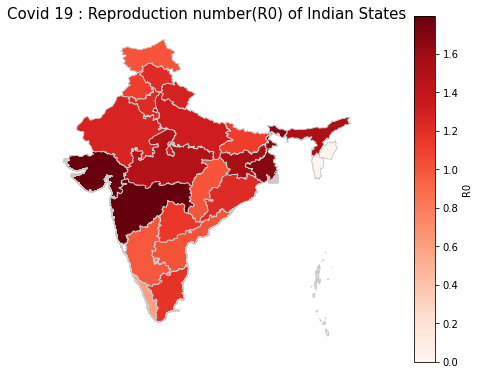

In [77]:
import matplotlib.pyplot as plt
#%matplotlib inline
import geopandas as gpd
#shafefile downloaded from https://www.diva-gis.org/gdata whole directory for india nad administration
shapefile = 'Covid19/IND_adm/IND_adm1.shp'
gdf = gpd.read_file(shapefile)[['ID_1', 'NAME_1', 'geometry']]
gdf.columns = ['state_code', 'state', 'geometry']
df['State/UnionTerritory'].replace({'Odisha': 'Orissa',
                                     'Andaman and Nicobar Islands': 'Andaman and Nicobar', 
                                     'Uttarakhand':'Uttaranchal',
                                     'Dadra and Nagar Haveli and Daman and Diu': 'Daman and Diu' },inplace=True) 
df_total = gdf.merge(df, how = 'inner', left_on = 'state', right_on = 'State/UnionTerritory')
df_total['Rzero'].fillna(1.0)
variable = 'Rzero'
df_total = df_total[['state', 'State/UnionTerritory','geometry',variable]] 

print(df_total[variable].min(), df_total[variable].max())
# set the range for the choropleth
vmin, vmax = df_total[variable].min(), df_total[variable].max()
#vmin,vmax = 0, 0.6
#create figure and axes for Matplotlib
fig,ax = plt.subplots(1, figsize=(10, 6))
# create map
df_total.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
#df_total.plot(column=variable, cmap='Reds', linewidth=0.8, edgecolor='0.8')
ax.axis('off')


ax.set_title('Covid 19 : Reproduction number(R0) of Indian States', fontdict={'fontsize': '15', 'fontweight' : '2'})

#ax.annotate('Source: ICMR' ,xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm = plt.cm.ScalarMappable(cmap='Reds',norm = )
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbaxes = fig.add_axes([0.8, 0.1, 0.03, 0.8])
cbar = plt.colorbar(sm,cax = cbaxes)
cbar.ax.set_ylabel('R0')
plt.savefig("Rzero.pdf")

df_total


In [78]:
#import matplotlib.pyplot as plt
#import pandas as pd

#df_in =pd.read_csv("Covid19/in.csv",usecols =['city','lat','lng','admin'])
#regex function to change charater in a name
#df_in['admin'].replace({'ā':'a', 'ī': 'i'},regex=True,inplace=True)
#df_new= df_in.set_index('admin').groupby(level = 0)['lat','lng'].agg({'lat':np.mean,'lng':np.mean})
#df_new
